🧬 Gerando sequências de DNA sintéticas...
✅ Dataset criado com 1000 sequências.
⚙️ Processando dados com K-mer analysis...
🧠 Treinando o modelo (Random Forest)...

🎯 ACURÁCIA DO MODELO: 99.00%


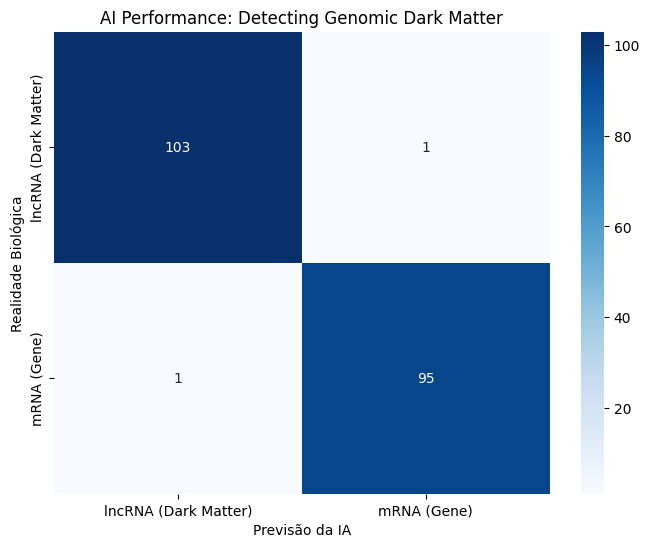

In [ ]:
# PROJETO: Dark Matter Detector (lncRNA vs mRNA Classifier)
# Autor: João Paiva
# Objetivo: Identificar "Matéria Escura" (RNA não-codificante) usando Machine Learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# --- PASSO 1: Gerar Dados Biológicos Sintéticos (Simulação) ---
# Na vida real, baixaríamos do NCBI. Aqui, geramos para funcionar AGORA.
print("🧬 Gerando sequências de DNA sintéticas...")

def generate_sequence(length, type="coding"):
    # Coding tem mais 'GC' (geralmente), Non-coding (Dark Matter) varia mais
    bases = ['A', 'C', 'G', 'T']
    if type == "coding":
        weights = [0.2, 0.3, 0.3, 0.2] # Mais GC
    else:
        weights = [0.3, 0.2, 0.2, 0.3] # Mais AT (comum em regiões não-codificantes)
    return "".join(np.random.choice(bases, p=weights, size=length))

# Criar 1000 sequências de exemplo
data = []
labels = []

for _ in range(500):
    data.append(generate_sequence(200, "coding"))
    labels.append("mRNA (Gene)")

for _ in range(500):
    data.append(generate_sequence(200, "non-coding"))
    labels.append("lncRNA (Dark Matter)")

df = pd.DataFrame({'Sequence': data, 'Type': labels})
print(f"✅ Dataset criado com {len(df)} sequências.")

# --- PASSO 2: Engenharia de Atributos (K-mer Counting) ---
# Transformar letras (ATCG) em números para a IA entender
# Usamos 'k-mers' (palavras de 3 letras, ex: ATG, GGC)
print("⚙️ Processando dados com K-mer analysis...")

def get_kmers(sequence, size=3):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

df['Kmers'] = df['Sequence'].apply(lambda x: ' '.join(get_kmers(x)))

cv = CountVectorizer(ngram_range=(4,4)) # Analisando padrões de 4 letras
X = cv.fit_transform(df['Kmers'])
y = df['Type']

# --- PASSO 3: Treinar a Inteligência Artificial ---
print("🧠 Treinando o modelo (Random Forest)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# --- PASSO 4: Avaliação e Gráficos ---
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)

print(f"\n🎯 ACURÁCIA DO MODELO: {acc*100:.2f}%")

# Criar Gráfico de Matriz de Confusão (Bonito para o Portfólio)
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('AI Performance: Detecting Genomic Dark Matter')
plt.xlabel('Previsão da IA')
plt.ylabel('Realidade Biológica')
plt.show()
